

## Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

df=pd.read_csv('/Users/marco/Desktop/DataMining2Project-master-2/NEW_datatraining.csv')

In [2]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [3]:
df_val=pd.read_csv('/Users/marco/Desktop/DataMining2Project-master-2/NEW_datavalidation.csv')

In [4]:
df_val['Temperature']=[round(num, 2) for num in df_val['Temperature']]
df_val['Humidity']=[round(num, 4) for num in df_val['Humidity']]
df_val['Light']=[round(num, 1) for num in df_val['Light']]
df_val['CO2']=[round(num, 2) for num in df_val['CO2']]

In [5]:
df_val.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-11 14:48:00,21.76,31.1333,437.3,1029.67,1,2,11,14:48:00,14,0.0,1.0
1,2015-02-11 14:49:00,21.79,31.0000,437.3,1000.00,1,2,11,14:49:00,14,0.0,1.0
2,2015-02-11 14:50:00,21.77,31.1225,434.0,1003.75,1,2,11,14:50:00,14,0.0,1.0
3,2015-02-11 14:51:00,21.77,31.1225,439.0,1009.50,1,2,11,14:51:00,14,0.0,1.0
4,2015-02-11 14:51:59,21.79,31.1333,437.3,1005.67,1,2,11,14:51:59,14,0.0,1.0


In [6]:
df_conc=pd.concat([df,df_val], sort=False)

In [7]:
df_conc.shape

(17895, 12)

In [8]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [9]:
del df_conc['date']
del df_conc['hour']

### data preparation 

In [10]:
#encoding

class_name = 'Occupancy'


In [11]:
df_conc.shape

(17895, 10)

In [12]:
res = prepare_dataset(df_conc, class_name)
df_conc, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df_conc.head()

,Temperature,Humidity,Light,CO2,Ora,day,absH,weekend,out_of_turn,Occupancy
0,23.18,27.2720,426.0,721.25,2,4,17,0.0,1.0,1
1,23.15,27.2675,429.5,714.00,2,4,17,0.0,1.0,1
2,23.15,27.2450,426.0,713.50,2,4,17,0.0,1.0,1
3,23.15,27.2000,426.0,708.25,2,4,17,0.0,1.0,1
4,23.10,27.2000,426.0,704.50,2,4,17,0.0,1.0,1


In [13]:
df_conc[class_name].value_counts()

0    14117
1     3778
Name: Occupancy, dtype: int64

In [14]:
rows2remove = np.random.choice(df_conc[df_conc[class_name] == 1].index, 3778-850, replace=False)

In [15]:
len(df_conc), len(rows2remove)

(17895, 2928)

In [16]:
df2 = df_conc.drop(index=rows2remove, axis=0)
print(len(df2))

13372


In [17]:
#ho seguito le indicazioni date (96% - 4%)
print('Dataset shape %s' % Counter(df2[class_name]))

Dataset shape Counter({0: 12774, 1: 598})


## data partitioning

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [19]:
attributes = [col for col in df_conc.columns if col != class_name]
X = df2[attributes].values
y = df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [20]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([8941,  419])), (array([0, 1]), array([3833,  179])))

## Classification DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# sample leaf che da risultati ottimali senza incorrere in overfitting è 5 

clf = DecisionTreeClassifier(min_samples_leaf= 5, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))
print(cross_val_score(clf, X, y))

Accuracy 0.9945164506480558
F1-score [0.99713392 0.93678161]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3833
           1       0.96      0.91      0.94       179

    accuracy                           0.99      4012
   macro avg       0.98      0.95      0.97      4012
weighted avg       0.99      0.99      0.99      4012

[0.98070884 0.97733902 0.99169845]


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [44]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

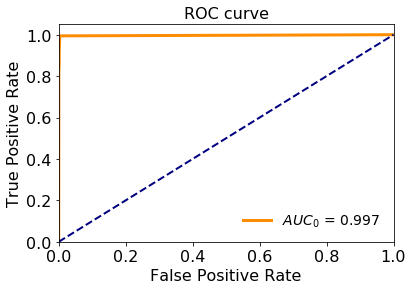

In [45]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## adjust the decision threshold

Accuracy 0.9922731804586241
F1-score [0.99596722 0.90801187]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3833
           1       0.97      0.85      0.91       179

    accuracy                           0.99      4012
   macro avg       0.98      0.93      0.95      4012
weighted avg       0.99      0.99      0.99      4012

[0.98070884 0.97733902 0.99169845]


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


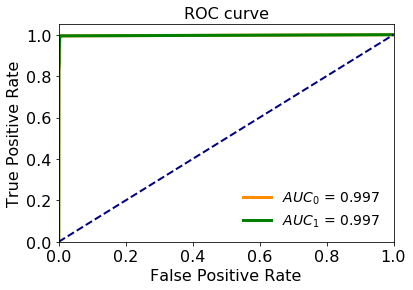

In [46]:
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X, y))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# classification NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X, y))

Accuracy 0.9783150548354935
F1-score [0.98852091 0.80449438]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3833
           1       0.67      1.00      0.80       179

    accuracy                           0.98      4012
   macro avg       0.84      0.99      0.90      4012
weighted avg       0.99      0.98      0.98      4012

[0.98743831 0.99192282 0.75835764]


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


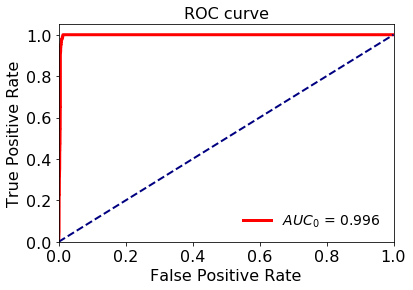

In [31]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='red', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## adjust the decision threshold

Accuracy 0.9798105682951147
F1-score [0.98932103 0.81548975]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3833
           1       0.69      1.00      0.82       179

    accuracy                           0.98      4012
   macro avg       0.84      0.99      0.90      4012
weighted avg       0.99      0.98      0.98      4012

[0.98743831 0.99192282 0.75835764]


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


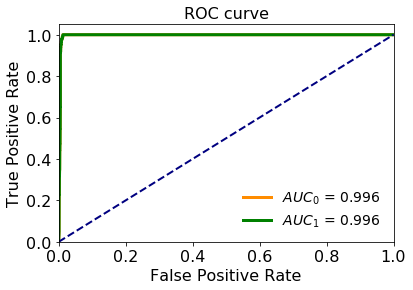

In [32]:
clf = GaussianNB()
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X, y))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# classification KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
clf = KNeighborsClassifier(n_neighbors=13, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [39]:
y_pred = clf.predict(X_test)

# performance metrices con n_vicini=5
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X, y))

Accuracy 0.9937686939182453
F1-score [0.99673245 0.93297587]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3833
           1       0.90      0.97      0.93       179

    accuracy                           0.99      4012
   macro avg       0.95      0.98      0.96      4012
weighted avg       0.99      0.99      0.99      4012



/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.987214   0.98653803 0.98519183]


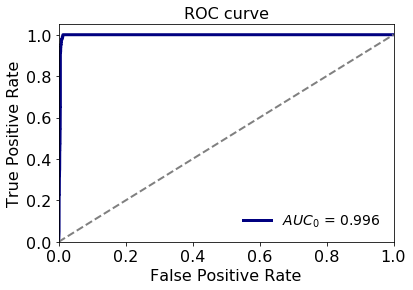

In [40]:
plt.plot(fpr0, tpr0, color='navy', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## adjust the decision threshold

Accuracy 0.9900299102691924
F1-score [0.99480519 0.87654321]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3833
           1       0.98      0.79      0.88       179

    accuracy                           0.99      4012
   macro avg       0.98      0.90      0.94      4012
weighted avg       0.99      0.99      0.99      4012



/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.987214   0.98653803 0.98519183]


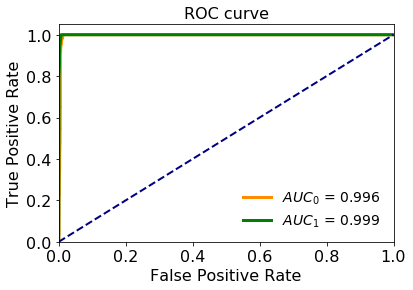

In [41]:
#con gridsearch --> vicini =13

clf = KNeighborsClassifier(n_neighbors=13, weights='uniform')
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(cross_val_score(clf, X, y))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()